# Configuration parameters

In [165]:
# mandatory:
file_name = 'example/sensor_348_high.png'
num_slices = 28
slice_width = 160
slice_height = 126
export_color_palette = True
invert_output = False

# optional:
output_file_name = None
# output_file_name = 'output/sensor_348_high.vox'

# Import and conversion steps

In [166]:
# Import the PNG texture’s image slices

from image_slicer import slice

tiles = slice(file_name, col=num_slices, row=1, save=False)

In [167]:
# Convert the image slices to a numpy array

import numpy as np

data = np.empty((slice_height, slice_width, 0))

for tile in tiles:
    pix = np.array(tile.image)
    data = np.dstack((data, pix))

[]

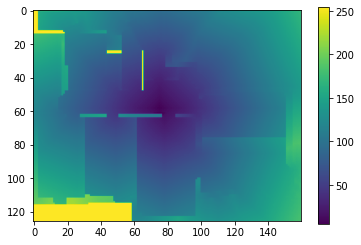

In [168]:
# Show a debug representation of the first image slice

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(data[:,:,0])
plt.colorbar()
plt.plot()

In [169]:
# Convert the data from numpy’s to MagicaVoxel’s coordinate system

if export_color_palette:
    data = np.array(data, dtype=np.uint8)
    if invert_output:
        data = 255 - data
else:
    data = np.array(data, dtype=bool)
    if invert_output:
        data = data != True

data = np.rot90(data, 1, (1,2))
data = np.flip(data, 2)
data = np.rot90(data, 2)
data = np.flip(data, 2)
data = np.flip(data, 1)

In [170]:
# Create the VOX file in memory from the coordinate-transformed voxel data

from pyvox.models import Vox

vox = Vox.from_dense(data)

In [171]:
# Create and set a color palette by taking one of matplotlib’s default color scales

if export_color_palette:
    from matplotlib.cm import inferno
    from pyvox.models import Color
    
    pal = [ Color(0,0,0,0) ] + [ Color( *[ int(255*x) for x in inferno(i/255)] ) for i in range(255) ]
    vox.palette = pal

In [172]:
# Write the VOX file from memory to the (optionally specified) output path

from pyvox.writer import VoxWriter

output_path = None

if output_file_name:
    output_path = output_file_name
else:
    output_path = file_name.replace('.png', '.vox')

VoxWriter(output_path, vox).write()